# Proyecto UT5:
## Predicción del tipo de un pokémon a partir de su imagen

### Imports

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras.layers import Normalization, IntegerLookup, StringLookup

import os
import shutil

### Data

Primero preparamos los pokemon con sus tipos.

Podemos observar que el dataframe incluye:
* __Name__: El nombre del pokemon.
* __Type1__: El tipo principal del pokemon.
* __Type2__: El tipo secundario del pokemon. En principio no lo utilizaremos para nada para simplificar un poco las cosas.

In [318]:
dataframe = pd.read_csv("pokemon.csv")
dataframe

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


Creamos la variable clases, en la que guardaremos los diferentes tipos que hay. Comprobamos que se ajustan a los tipos reales y no hay ningún tipo de error.

In [319]:
clases = dataframe.Type1.unique()
clases

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Ahora preparamos las imágenes de los pokémons.

Para empezar guardamos el path de la imagen del pokemon en el dataframe. (Código sacado de internet).  
Así ya tenemos guardado cada pokémon con su respectiva imagen.

In [320]:
# import the modules
images = []
# get the path or directory
folder_dir = "images/images"
for image in os.listdir(folder_dir):
    # check if the image end swith png or jpg or jpeg
    if (image.endswith(".png") or image.endswith(".jpg") or image.endswith(".jpeg")):
        # display
        images.append(image)


Como las imágenes no están todas en el mismo formato, hay que tener cuidado y estar pendiente de si se guardan en un formato u otro, por eso mismo vamos a guardarnos también su formato.

In [321]:
paths = []
format = []
for d in dataframe.Name:
    for i in images:
        if (d + ".png" == i or d + ".jpg" == i):
            paths.append("images/images/"+i)
            if (d + ".png" == i):
                format.append(".png")
            else:
                format.append(".jpg")

Así pues ahora tenemos guardado el __Path__ de la imagen del pokemon y también el __formato__ en el que está guardado.

In [322]:
dataframe = dataframe.assign(ImgPath=paths)
dataframe = dataframe.assign(Format=format)

dataframe

,Name,Type1,Type2,ImgPath,Format
0,bulbasaur,Grass,Poison,images/images/bulbasaur.png,.png
1,ivysaur,Grass,Poison,images/images/ivysaur.png,.png
2,venusaur,Grass,Poison,images/images/venusaur.png,.png
3,charmander,Fire,NaN,images/images/charmander.png,.png
4,charmeleon,Fire,NaN,images/images/charmeleon.png,.png
...,...,...,...,...,...
804,stakataka,Rock,Steel,images/images/stakataka.jpg,.jpg
805,blacephalon,Fire,Ghost,images/images/blacephalon.jpg,.jpg
806,zeraora,Electric,NaN,images/images/zeraora.jpg,.jpg
807,meltan,Steel,NaN,images/images/meltan.jpg,.jpg


Una vez tenemos hecho lo anterior, organizamos el directorio de imágenes según su tipo.  
Para ello utilizamos las librerías __os__ y __shutil__.  

En caso de querer usar solo algunas clases en vez de todas, utilizamos el código comentado.

In [323]:
# os.mkdir("imageset")
# for clase in clases:
#     # if (clase == "Grass" or clase == "Water" or clase == "Fire"):
#         os.mkdir("imageset/" + clase)

# for (path, type, name, format) in zip(dataframe.ImgPath, dataframe.Type1, dataframe.Name, dataframe.Format):
#     # if (type == "Grass" or type == "Water" or type == "Fire"):
#         shutil.copyfile(path, "imageset/" + type + "/" + name + format)

Finalmente cargamos las imagenes ya organizadas por tipos.  
Dividimos 

In [324]:
pokemons_train = tf.keras.utils.image_dataset_from_directory(directory="imageset", subset="training", validation_split=0.2, seed=413)
pokemons_val = tf.keras.utils.image_dataset_from_directory(directory="imageset", subset="validation", validation_split=0.2, seed=413)
pokemons_test = tf.keras.utils.image_dataset_from_directory(directory="images")

Found 809 files belonging to 18 classes.
Using 648 files for training.
Found 809 files belonging to 18 classes.
Using 161 files for validation.
Found 809 files belonging to 1 classes.


In [325]:
cls = pokemons_train.class_names
cls

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

### Modelo

Ajustamos el numero de clases según la cantidad de clases que detecte en los datos.

In [326]:
num_clases = len(pokemons_train.class_names)

Entrenamiento del modelo, con varias capas convolucionales para detectar imágenes.

In [327]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, 5, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, 7, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(num_clases, activation="softmax")
])

In [336]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, 5, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(num_clases, activation="softmax")
])

Mostramos un pequeño resumen del modelo que hemos hecho, para comprobar.

In [328]:
# model.summary()

Compilamos el modelo

In [337]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

Entrenamo el modelo.  
Asignamos como datos de entrenamiento el _pokemons_train_ y como datos de validación el _pokemons_val_

In [338]:
model.fit(
    pokemons_train,
    validation_data = pokemons_val,
    epochs=50
)

Epoch 1/50
 5/21 [======>.......................] - ETA: 28s - loss: 1782.3453 - accuracy: 0.0938

KeyboardInterrupt: 

Hacemos una lista de predicciones.

In [ ]:
predictions = model.predict(pokemons_test)

Elegimos un número al azar y mostramos su predicción.

Luego mostramos el tipo al que más puntuación ha dado y mostramos la imagen para poder comprobarlo.

Hay un 95.0 de posibilidades de que pertenezca al tipo Water
El resto de opciones son:
Bug : 0.0
Dark : 0.0
Dragon : 0.0
Electric : 0.0
Fairy : 0.0
Fighting : 0.0
Fire : 0.1
Flying : 0.1
Ghost : 0.7
Grass : 1.4
Ground : 0.8
Ice : 0.0
Normal : 0.1
Poison : 0.5
Psychic : 0.5
Rock : 0.1
Steel : 0.7
Water : 95.0


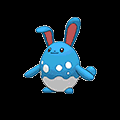

In [ ]:
num = 456
print("Hay un %.1f de posibilidades de que pertenezca al tipo" % (predictions[num].max() * 100), cls[(predictions[num].argmax())])


print("El resto de opciones son:")
c = 0
s = 0
for p in predictions[num]:
    print(cls[c], ": %.1f" % (p*100))
    c += 1

tf.keras.utils.load_img(pokemons_test.file_paths[num])